In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import math

In [2]:
mpl.rcParams['figure.dpi'] = 300

In [3]:
def normal_distribution(x, mu = 0, sigma = 1):
    a = 1 / (sigma * np.sqrt(2 * math.pi))
    return a * math.exp(-0.5 * ((x - mu) / sigma)**2)

In [4]:
x = np.linspace(-5, 5, 250)
mu = 0
sigma = 1
y = [normal_distribution(x) for x in x]

Text(0.5, 1.0, 'Standard normal distribution')

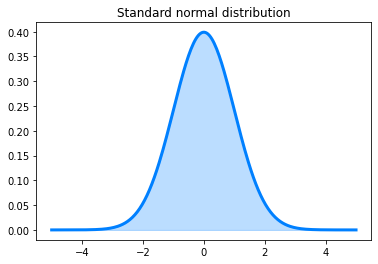

In [5]:
plt.plot(x, y, color='#0080ff', lw=3)
plt.fill_between(x, y, color='#0080ff44')
plt.title("Standard normal distribution")

In [6]:
# Suppose we want to integrate the function from -5 to 5.
N = 50
N_inv = 1.0 / N
estimate = 0
a = -5
b = 5
V = b - a

xs = []
ys = []

for _ in range(N):
    x = np.random.uniform(-5, 5)
    sample = normal_distribution(x)
    y_hat = V * sample * N_inv
    estimate += y_hat

    xs.append(x)
    ys.append(y_hat)


print("Integral estimate: {}".format(estimate))
print("Variance: {}".format(np.var(ys)))


Integral estimate: 0.5867480128770036
Variance: 0.00032723811250094735


In [7]:
def integrate_mc(f, a, b, n):
    estimate = 0
    for _ in range(n):
        x = np.random.uniform(a, b)
        estimate += f(x)
    return (b - a) * estimate / n

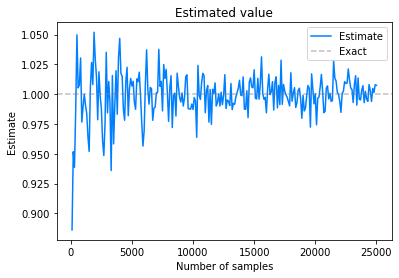

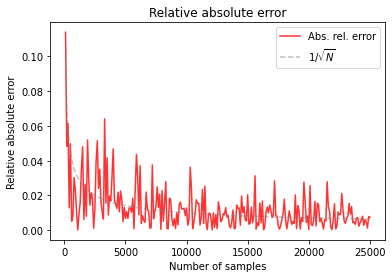

In [8]:
x = np.linspace(100, 25000, 250)
y = np.array([integrate_mc(normal_distribution, -5, 5, int(n)) for n in x])

plt.plot(x, y, color='#0080ff', lw=1.5)
plt.title("Estimated value")
plt.xlabel("Number of samples")
plt.ylabel("Estimate")
plt.axhline(1.0, lw=1.5, color='gray', ls='dashed', alpha=0.5)
plt.legend(["Estimate", "Exact"])
plt.show()

plt.plot(x, abs(y - 1.0), lw=1.5, color="#ff3333")
plt.title("Relative absolute error")
plt.ylabel("Relative absolute error")
plt.xlabel("Number of samples")
plt.plot(x, 1.0 / (np.sqrt(x)), lw=1.5, color="gray", alpha=0.5, ls='dashed')
plt.legend(["Abs. rel. error", "$1 / \sqrt{N}$"])

plt.show()

Estimate of pi: 3.1296


[Text(-1.25, 0, ''),
 Text(-1.0, 0, ''),
 Text(-0.75, 0, ''),
 Text(-0.5, 0, ''),
 Text(-0.25, 0, ''),
 Text(0.0, 0, ''),
 Text(0.25, 0, ''),
 Text(0.5, 0, ''),
 Text(0.75, 0, ''),
 Text(1.0, 0, ''),
 Text(1.25, 0, '')]

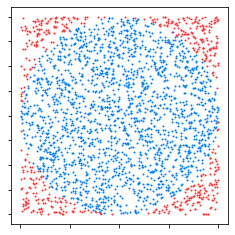

In [9]:
inside = []
outside = []
n = 2500

for _ in range(n):
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    if x * x + y * y < 1:
        inside.append((x, y))
    else:
        outside.append((x, y))

pi = 4.0 * len(inside) / n

print("Estimate of pi: {}".format(pi))
plt.scatter([x for x, _ in inside], [y for _, y in inside], color='#0080ff', s=1)
plt.scatter([x for x, _ in outside], [y for _, y in outside], color='#ff3333', s=1)
plt.gca().set_aspect('equal')

ax = plt.gca()
ax.set_yticklabels([])
ax.set_xticklabels([])


Estimate of pi: 3.0768


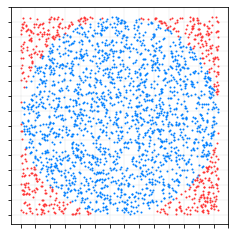

In [10]:
inside = []
outside = []
n = 2500

for _ in range(n):
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    if x * x + y * y < 1:
        inside.append((x, y))
    else:
        outside.append((x, y))

pi = 4.0 * len(inside) / n

print("Estimate of pi: {}".format(pi))
plt.scatter([x for x, _ in inside], [y for _, y in inside], color='#0080ff', s=1)
plt.scatter([x for x, _ in outside], [y for _, y in outside], color='#ff3333', s=1)
plt.gca().set_aspect('equal')

strat_size = 0.15
major_ticks = np.arange(-1, 1 + strat_size, strat_size)
#minor_ticks = np.arange(-1, 1, 0.1)

ax = plt.gca()
ax.set_xticks(major_ticks)
#ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
#ax.set_yticks(minor_ticks, minor=True)

ax.set_yticklabels([])
ax.set_xticklabels([])

plt.grid(which="both", ls='--', lw='0.2')